# Time series Forecasting of stock Market Data with ARIMA in Python

`Author`: **Muneeb Qureshi**

# 1. Time series data


Time series data!

Time series data is a sequence of data points measured at regular time intervals. It's commonly used in finance, economics, weather forecasting, and many other fields.

Some common characteristics of time series data include:

* Time stamps: Each data point is associated with a specific time stamp.
* Sequential dependence: The data points are dependent on each other in a sequential manner.
* Trends and seasonality: Time series data often exhibit trends and seasonality, which can be used to make predictions.

Some popular techniques for working with time series data include:

* ARIMA (AutoRegressive Integrated Moving Average) models
* Exponential Smoothing (ES)
* Prophet
* LSTM (Long Short-Term Memory) networks

Some popular libraries for working with time series data in Python include:

* `pandas` for data manipulation and analysis
* `statsmodels` for statistical modeling
* `scikit-learn` for machine learning
* `TensorFlow` or `PyTorch` for deep learning




# Stock Market Data scrapping and prediction using python

## Importing usefull libraries


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import  seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
#define the dates to fetch
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

## Scrapping the data

In [4]:
#define the ticker

ticker = 'GOOGL'

#get the data
df = yf.download(ticker,start=start_date, end=end_date,progress=False)
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-26,129.770004,130.360001,127.220001,128.570007,128.252426,25718700
1,2023-09-27,128.570007,130.899994,128.570007,130.539993,130.217560,22746500
2,2023-09-28,129.839996,133.300003,129.789993,132.309998,131.983185,22513100
3,2023-09-29,133.279999,134.050003,130.360001,130.860001,130.536774,30848100
4,2023-10-02,131.210007,134.419998,131.169998,134.169998,133.838593,22288000


## Data Visualization

In [5]:
fig = px.line(df,x='Date',y=df.columns,title="Stock Price")
fig.show()

In [6]:
#select columns 
df = df[['Date','Close']]
df.head()

,Date,Close
0,2023-09-26,128.570007
1,2023-09-27,130.539993
2,2023-09-28,132.309998
3,2023-09-29,130.860001
4,2023-10-02,134.169998


In [7]:
#plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='GOOGL Stock Price')
fig.show()


## Checking stationarity

In [8]:
#stationary check on data using adfuller
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result [1] <= 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

check_stationarity(df['Close'])


ADF Statistic: -1.581513
p-value: 0.492873
Non-Stationary


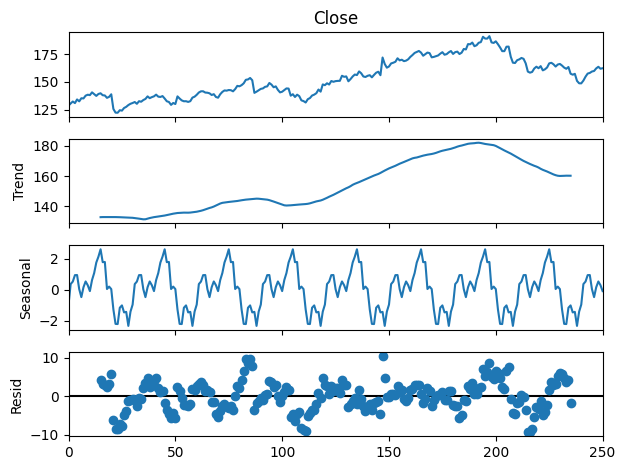

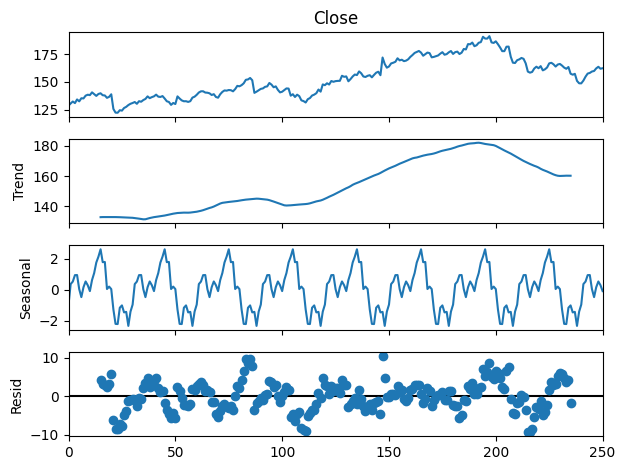

In [9]:
#decompose the data for trend, seasonality and residual

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive',period=30)
decompose.plot()

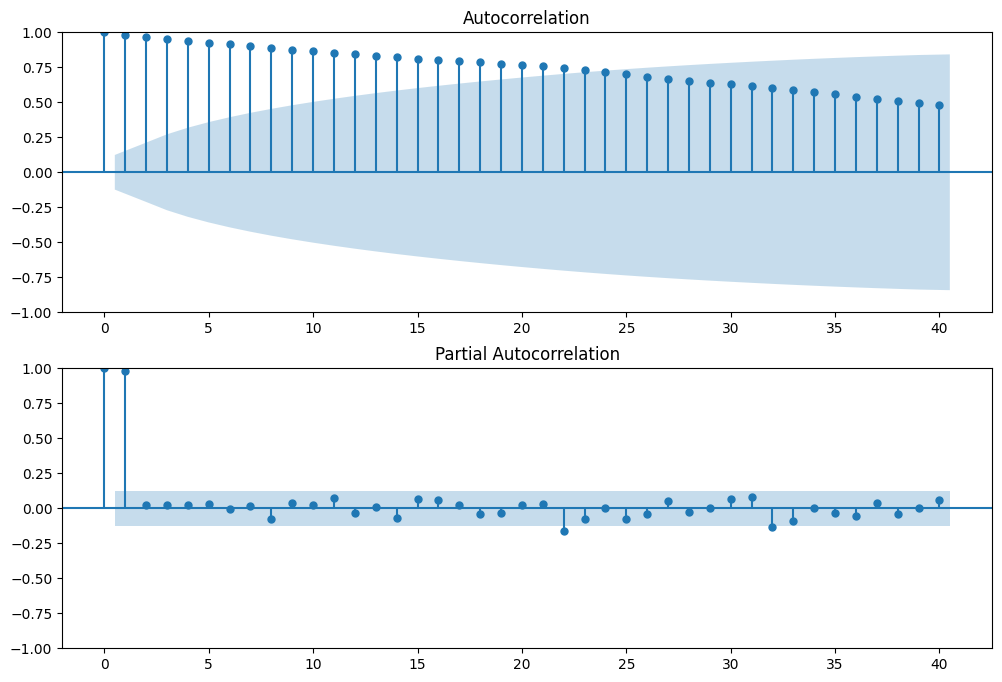

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Close'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Close'],lags=40,ax=ax2)




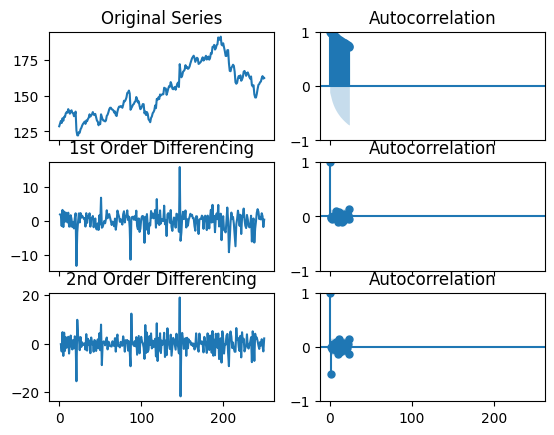

In [11]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


`d = 1`

# Lets find `p` Value

           0
0   1.000000
1   0.983289
2   0.967624
3   0.953058
4   0.939435
5   0.926892
6   0.914372
7   0.902453
8   0.888079
9   0.875178
10  0.863201
11  0.853752
12  0.843189
13  0.832950
14  0.820543
15  0.810213
16  0.802266
17  0.794890
18  0.786442
19  0.776480
20  0.767511
21  0.758977
22  0.745974
23  0.731312


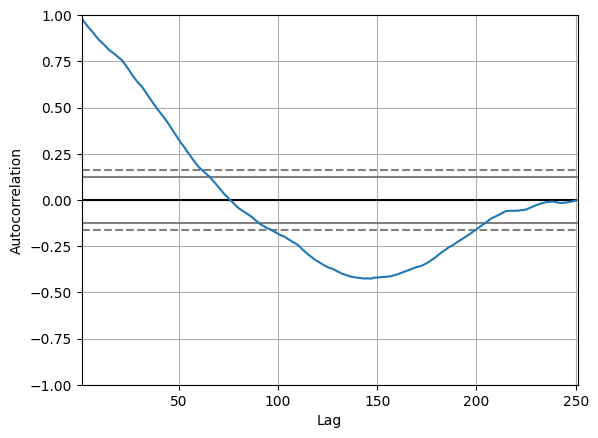

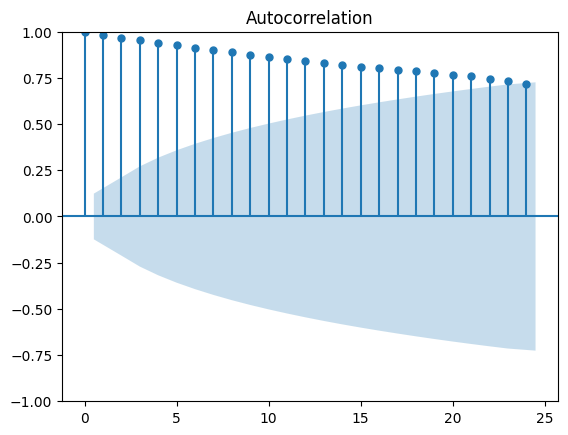

In [12]:
#plots
pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'],alpha=.05)
from statsmodels.tsa.stattools import acf,pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

`p=4`

# Lets find `q` Value

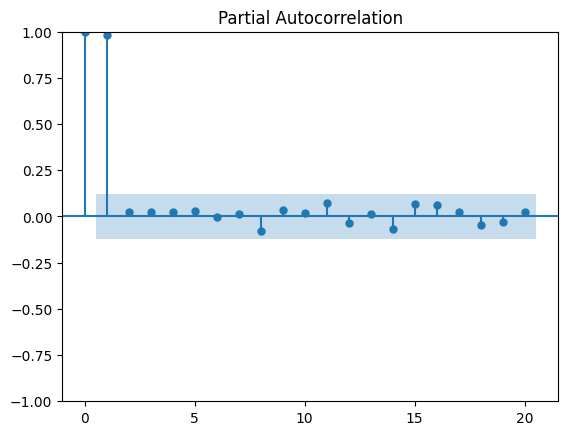

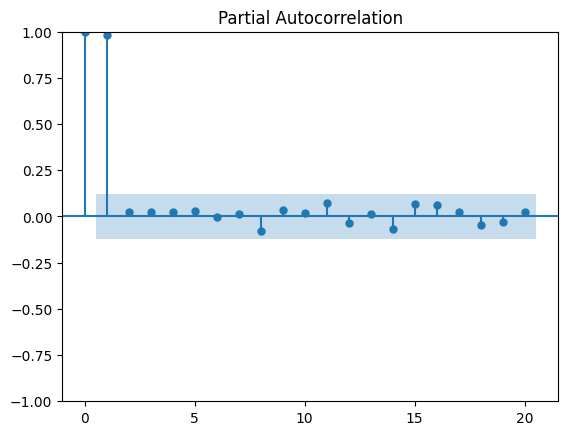

In [13]:
#partial autocorrelation
from statsmodels.tsa.stattools import pacf
plot_pacf(df['Close'],lags=20,alpha=.05)

`q=2`

In [14]:
#lets define p,d and q
p=4
d=1
q=2

In [15]:
#lets run ARIMA with pmdarima

from pmdarima.arima import auto_arima

model = auto_arima(df['Close'],start_p=1,start_q=1,max_p=2,max_q=2,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1333.193, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1234.504, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1333.764, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1229.856, Time=0.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1228.020, Time=0.82 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1232.623, Time=0.24 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1229.852, Time=0.65 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1231.871, Time=0.78 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1230.0

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -611.010
Date:                            Wed, 25 Sep 2024   AIC                           1228.020
Time:                                    21:51:32   BIC                           1238.437
Sample:                                         0   HQIC                          1232.218
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7094      0.053    -13.273      0.000      -0.814      -0.605
ar.S.L24      -0.1741      0.052     -3.372      0.001      -0.275      -0.073
sigma2         9.6857      0.577     16.796      0.000       8.556      10.816
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                93.63
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.20
Prob(H) (two-sided):                  0.81   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -603.241
Date:                Wed, 25 Sep 2024   AIC                           1216.482
Time:                        21:51:33   BIC                           1234.090
Sample:                             0   HQIC                          1223.569
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3653      0.909     -0.402      0.688      -2.147       1.416
ar.L2          0.5072      0.887      0.572      0.567      -1.231       2.245
ma.L1          0.3475      0.892      0.390      0.6

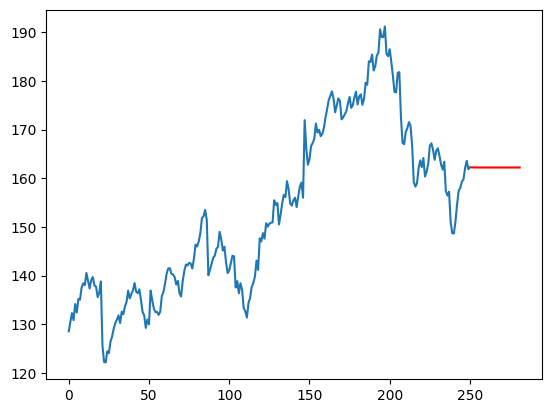

In [17]:
#stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 2,1,2

model = ARIMA(df['Close'], order=(p,d,q))
model = model.fit()
print(model.summary())

#predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
print(forecast)

#plot the forecast

plt.plot(df['Close'])
plt.plot(forecast, color='red')


- Here we can see that we have a unusal forecast/prediction. The reason behind this is that we have used ARIMA 
  model instead of SARIMAX model.
- Now here arises a question that why we should use SARIMAX instead of ARIMA?
- The answer is that because we have seasonality

In [18]:
#let's run SARIMA

import statsmodels.api as sm
import warnings

p,d,q = 2,1,2

model = sm.tsa.statespace.SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()

print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -589.274
Date:                            Wed, 25 Sep 2024   AIC                           1196.547
Time:                                    21:51:39   BIC                           1227.798
Sample:                                         0   HQIC                          1209.142
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4849      1.498     -0.324      0.746      -3.420       2.450
ar.L2          0.4417      1.443   

c:\Users\Discount Laptop\anaconda3\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



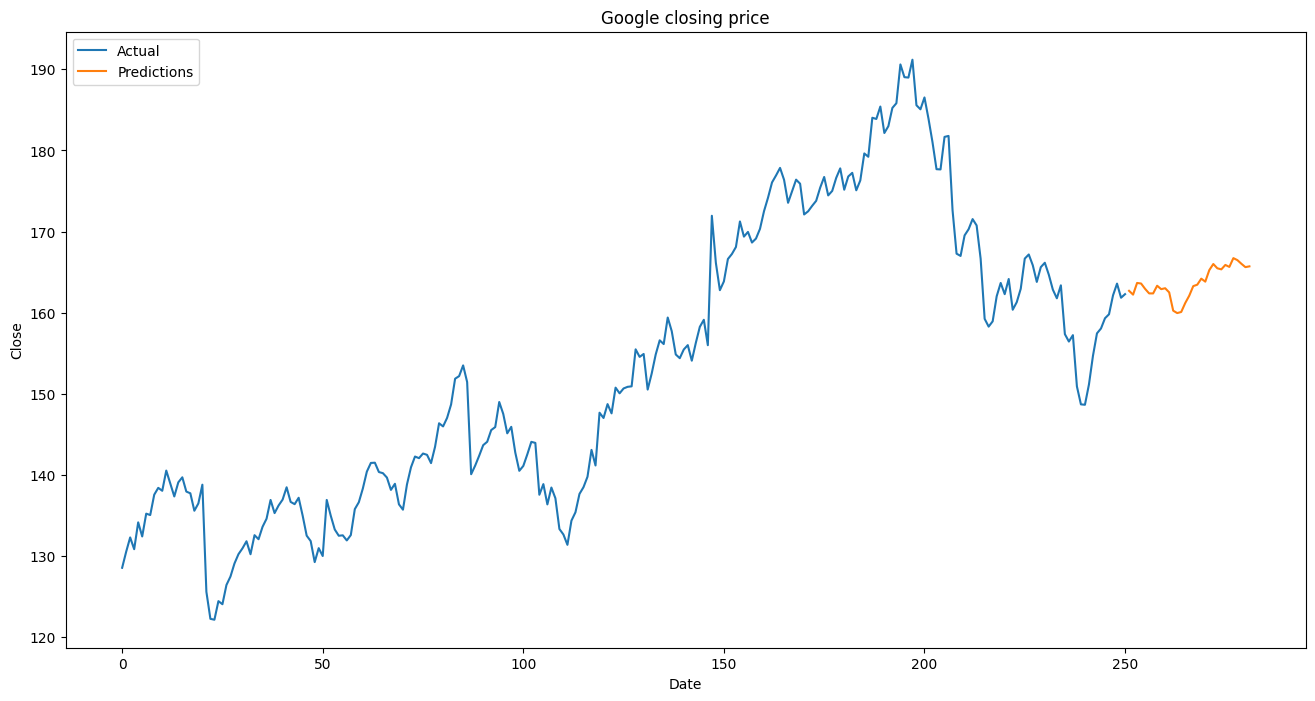

In [27]:
predictions = model.predict(start=len(df['Close']),end=len(df['Close'])+30)

#plot the predictions
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Google closing price")
#change legend location
plt.legend(loc='upper left')
plt.show()

- Here we can see that we have a very good prediction.
- The red line shows the predicted values and the blue line shows the actual values.